In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
df = pd.read_csv("MSFT.csv")

In [40]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9444,2023-09-01,331.309998,331.989990,326.779999,328.660004,328.660004,14931200
9445,2023-09-05,329.000000,334.850006,328.660004,333.549988,333.549988,18553900
9446,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800
9447,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000
9448,2023-09-08,330.089996,336.160004,329.459991,334.269989,334.269989,19530100


In [41]:
df.shape

(9449, 7)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9449 entries, 0 to 9448
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9449 non-null   object 
 1   Open       9449 non-null   float64
 2   High       9449 non-null   float64
 3   Low        9449 non-null   float64
 4   Close      9449 non-null   float64
 5   Adj Close  9449 non-null   float64
 6   Volume     9449 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 516.9+ KB


In [43]:
df = df[['Date','Close']]

In [44]:
df.head()

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090


In [45]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9444    2023-09-01
9445    2023-09-05
9446    2023-09-06
9447    2023-09-07
9448    2023-09-08
Name: Date, Length: 9449, dtype: object

In [46]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)
    
df_object = str_to_datetime("1986-03-13")

df_object

datetime.datetime(1986, 3, 13, 0, 0)

In [47]:
df['Date']=df['Date'].apply(str_to_datetime)

In [48]:
df['Date']

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9444   2023-09-01
9445   2023-09-05
9446   2023-09-06
9447   2023-09-07
9448   2023-09-08
Name: Date, Length: 9449, dtype: datetime64[ns]

In [49]:
df.index = df.pop('Date')

In [50]:
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-09-01,328.660004
2023-09-05,333.549988
2023-09-06,332.880005


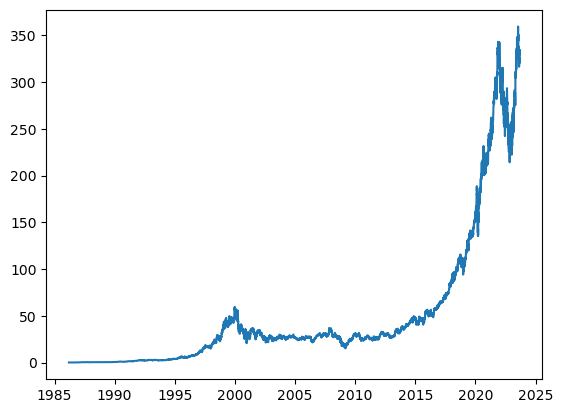

In [51]:
plt.plot(df.index,df['Close'])
plt.show()

In [61]:
def df_windowed(dataframe,first_date_str,last_date_str,n=3):
    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)
    
    target_date = first_date
    
    dates = []
    X,Y = [],[]
    
    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)
        
        if len(df_subset)!= n+1:
            print(f'error: window of size {n} is too large for date {target_date}')
            return 
        
        values = df_subset['Close'].to_numpy()
        x,y = values[:-1],values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        
        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split("-")
        year,month,day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
            
        target_date = next_date
        
        
        if target_date == last_date:
            last_time = True
            
            
    ret_df = pd.DataFrame({})
    ret_df["Target Date"] = dates
    
    X = np.array(X)
    for i in range(0,n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]
        
    ret_df['Target'] = Y
    
    return ret_df

# start day second time around 22nd september 2022
windowed_df = df_windowed(df,'2022-09-08',"2023-09-08",n=3)

windowed_df
        
        
    
        
        

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-09-08,256.059998,253.250000,258.089996,258.519989
1,2022-09-09,253.250000,258.089996,258.519989,264.459991
2,2022-09-12,258.089996,258.519989,264.459991,266.649994
3,2022-09-13,258.519989,264.459991,266.649994,251.990005
4,2022-09-14,264.459991,266.649994,251.990005,252.220001
...,...,...,...,...,...
247,2023-09-01,328.410004,328.790009,327.760010,328.660004
248,2023-09-05,328.790009,327.760010,328.660004,333.549988
249,2023-09-06,327.760010,328.660004,333.549988,332.880005
250,2023-09-07,328.660004,333.549988,332.880005,329.910004


In [62]:
def windowed_df_x_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:,0]
    
    middle_matrix = df_as_np[:,1:-1]
    X = middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
    
    Y = df_as_np[:,-1]
    
    return dates,X.astype(np.float32),Y.astype(np.float32)

dates,X,y = windowed_df_x_y(windowed_df)

dates.shape,X.shape,y.shape

((252,), (252, 3, 1), (252,))

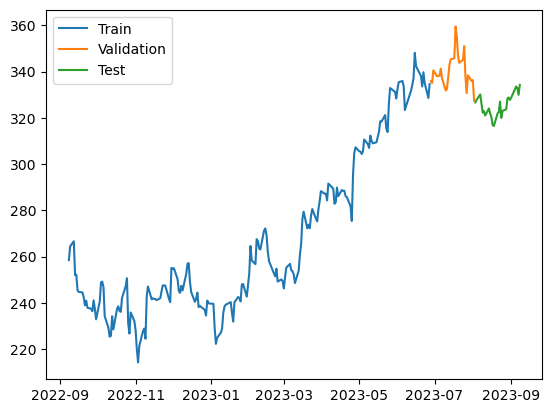

In [63]:
q_80 = int(len(dates)*.8)
q_90 = int(len(dates)*.9)
dates_train, X_train,y_train = dates[:q_80],X[:q_80],y[:q_80]

dates_val,X_val,y_val = dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
dates_test,x_test,y_test = dates[q_90:],X[q_90:],y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [65]:
model = Sequential([layers.Input((3,1)),
                    layers.LSTM(64),
                   layers.Dense(32,activation = 'relu'),
                   layers.Dense(32,activation = 'relu'),
                   layers.Dense(1)])
model.compile(loss = 'mse',
             optimizer = Adam(learning_rate = 0.01),
             metrics = ['mean_absolute_error'])

model.fit(X_train,y_train,validation_data = (X_val,y_val),epochs = 100)

Epoch 1/100
7/7 [==============================] - 3s 80ms/step - loss: 70448.0078 - mean_absolute_error: 263.2530 - val_loss: 108990.3828 - val_mean_absolute_error: 330.0548
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 61216.4336 - mean_absolute_error: 244.9926 - val_loss: 87750.3906 - val_mean_absolute_error: 296.1356
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 40554.3516 - mean_absolute_error: 197.6221 - val_loss: 49403.0508 - val_mean_absolute_error: 222.1462
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 12802.2578 - mean_absolute_error: 102.1139 - val_loss: 8146.6313 - val_mean_absolute_error: 89.9592
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 2783.1887 - mean_absolute_error: 43.6614 - val_loss: 56.3865 - val_mean_absolute_error: 5.6321
Epoch 6/100
7/7 [==============================] - 0s 7ms/step - loss: 4497.2241 - mean_absolute_error: 58.8070 - val_loss: 3600.8613 - val_me

7/7 [==============================] - 0s 7ms/step - loss: 970.2866 - mean_absolute_error: 26.3730 - val_loss: 4116.5786 - val_mean_absolute_error: 63.7453
Epoch 50/100
7/7 [==============================] - 0s 5ms/step - loss: 1016.4457 - mean_absolute_error: 26.7883 - val_loss: 5661.1191 - val_mean_absolute_error: 74.8826
Epoch 51/100
7/7 [==============================] - 0s 6ms/step - loss: 985.4175 - mean_absolute_error: 27.0700 - val_loss: 4844.3486 - val_mean_absolute_error: 69.2341
Epoch 52/100
7/7 [==============================] - 0s 5ms/step - loss: 980.2806 - mean_absolute_error: 25.7479 - val_loss: 5327.1787 - val_mean_absolute_error: 72.6181
Epoch 53/100
7/7 [==============================] - 0s 5ms/step - loss: 958.4543 - mean_absolute_error: 25.4134 - val_loss: 4119.7437 - val_mean_absolute_error: 63.7673
Epoch 54/100
7/7 [==============================] - 0s 6ms/step - loss: 979.6816 - mean_absolute_error: 27.4358 - val_loss: 4262.0767 - val_mean_absolute_error: 64.876

Epoch 98/100
7/7 [==============================] - 0s 5ms/step - loss: 65.4884 - mean_absolute_error: 6.5665 - val_loss: 183.9479 - val_mean_absolute_error: 11.6267
Epoch 99/100
7/7 [==============================] - 0s 7ms/step - loss: 61.1246 - mean_absolute_error: 6.3369 - val_loss: 217.6461 - val_mean_absolute_error: 13.1202
Epoch 100/100
7/7 [==============================] - 0s 5ms/step - loss: 51.8317 - mean_absolute_error: 5.7249 - val_loss: 174.9100 - val_mean_absolute_error: 11.4739


7/7 [==============================] - 0s 3ms/step


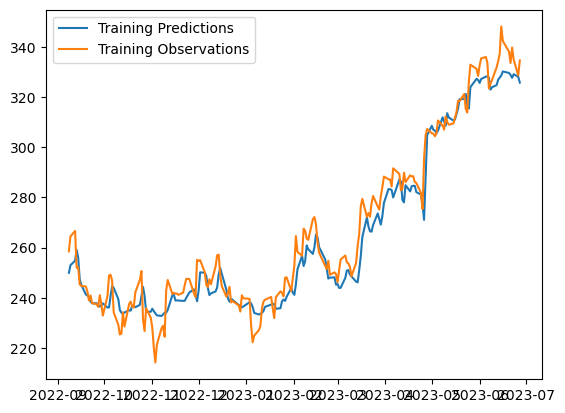

In [66]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.legend(['Training Predictions','Training Observations'])

1/1 [==============================] - 0s 22ms/step


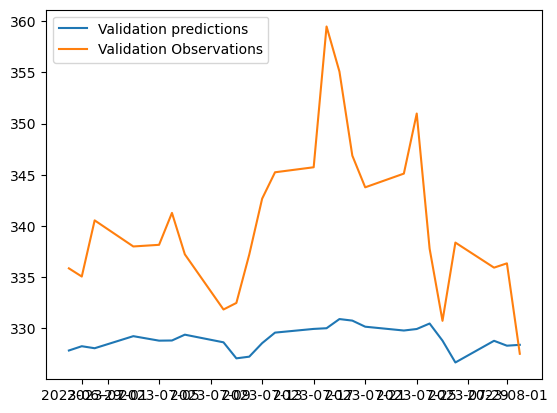

In [67]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.legend(["Validation predictions","Validation Observations"])

1/1 [==============================] - 0s 18ms/step


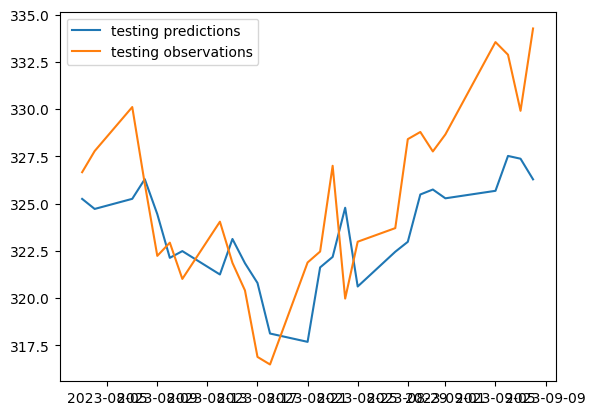

In [68]:
test_predictions = model.predict(x_test).flatten()

plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(["testing predictions", "testing observations"])

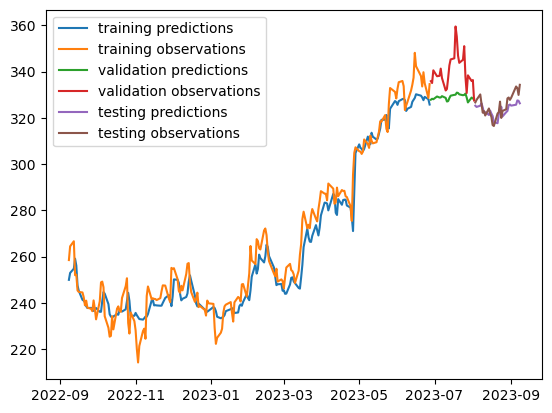

In [69]:
plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.legend(["training predictions",
          "training observations",
          "validation predictions",
          "validation observations",
          "testing predictions",
          "testing observations"])

In [72]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val,dates_test])

for target_dates in recursive_dates:
    last_window = deepcopy(X_train[-1])
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1]= next_prediction

1/1 [==============================] - 0s 18ms/step


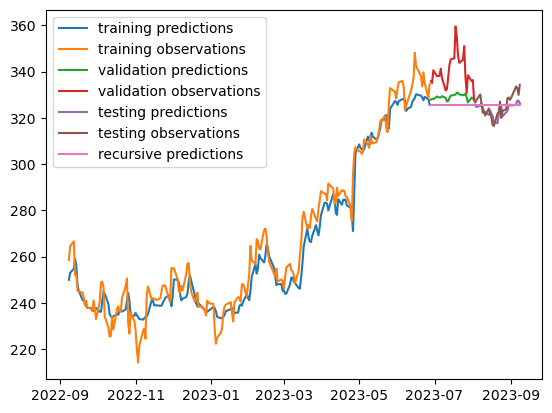

In [73]:
plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)
plt.plot(dates_val,val_predictions)
plt.plot(dates_val,y_val)
plt.plot(dates_test,test_predictions)
plt.plot(dates_test,y_test)
plt.plot(recursive_dates,recursive_predictions)
plt.legend(["training predictions",
          "training observations",
          "validation predictions",
          "validation observations",
          "testing predictions",
          "testing observations",
           "recursive predictions"])